In [ ]:
import pandas as pd     

df = pd.read_csv(r"D:\уник\мага\3сем\IIS\IIS-LR1\heart-disease.csv")

In [2]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



# 1. Загрузка данных и знакомство с ними


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем датасет
df = pd.read_csv(r"D:\уник\мага\3сем\IIS\IIS-LR1\heart-disease.csv")

# Общая информация
print("Размер датасета:", df.shape)
print("\nТипы данных:")
print(df.dtypes)

Размер датасета: (303, 14)

Типы данных:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [5]:
print("\nПервые строки:")
display(df.head())



Первые строки:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# Проверим статистики по числовым признакам
print("\nОсновные статистики по числовым признакам:")
display(df.describe())



Основные статистики по числовым признакам:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# Проверим уникальные значения в категориальных признаках
print("\nУникальные значения в категориальных признаках:")
for col in df.columns:
    if df[col].dtype == "object" or len(df[col].unique()) < 10:
        df[col] = df[col].astype('category')
        print(f"{col}: {df[col].unique()}")


Уникальные значения в категориальных признаках:
sex: [1, 0]
Categories (2, int64): [0, 1]
cp: [3, 2, 1, 0]
Categories (4, int64): [0, 1, 2, 3]
fbs: [1, 0]
Categories (2, int64): [0, 1]
restecg: [0, 1, 2]
Categories (3, int64): [0, 1, 2]
exang: [0, 1]
Categories (2, int64): [0, 1]
slope: [0, 2, 1]
Categories (3, int64): [0, 1, 2]
ca: [0, 2, 1, 3, 4]
Categories (5, int64): [0, 1, 2, 3, 4]
thal: [1, 2, 3, 0]
Categories (4, int64): [0, 1, 2, 3]
target: [1, 0]
Categories (2, int64): [0, 1]


In [8]:
# Выделим числовые и категориальные признаки
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = [col for col in df.columns if col not in num_cols]
print("\nЧисловые признаки:", num_cols)
print("Категориальные признаки:", cat_cols)


Числовые признаки: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Категориальные признаки: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


In [9]:
# Целевая переменная
target = "target"
print("\nЦелевая переменная:", target)


Целевая переменная: target


# 2. Очистка данных

In [10]:
# Проверим пропуски
print("\nПропуски по столбцам:")
print(df.isnull().sum())


Пропуски по столбцам:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [11]:

# Удалим дубликаты
print("\nКоличество дубликатов:", df.duplicated().sum())
df = df.drop_duplicates()


Количество дубликатов: 1


In [12]:
# Проверим диапазоны значений (например, возраст, давление)
print("\nМинимальные и максимальные значения:")
for col in num_cols:
    print(f"{col}: {df[col].min()} - {df[col].max()}")


Минимальные и максимальные значения:
age: 29 - 77
trestbps: 94 - 200
chol: 126 - 564
thalach: 71 - 202
oldpeak: 0.0 - 6.2


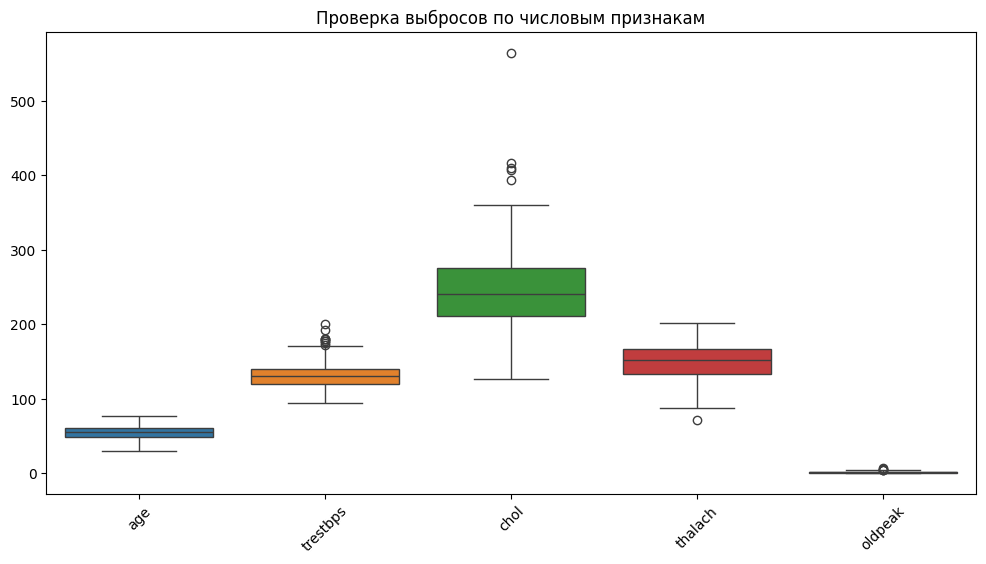

In [13]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.title("Проверка выбросов по числовым признакам")
plt.show()

# 3. Анализ признаков для модели

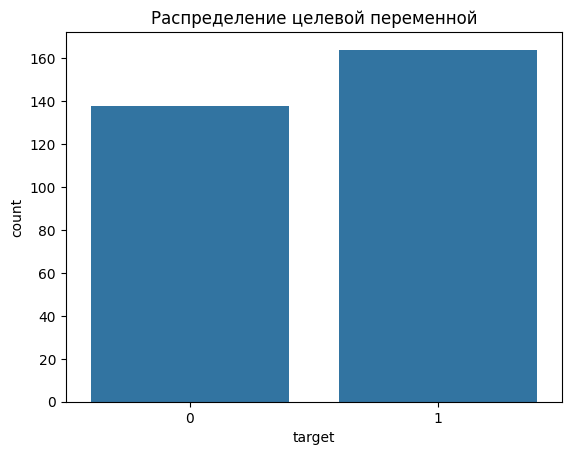

Вывод: целевая переменная сбалансирована (0 и 1 представлены примерно поровну).


<Figure size 640x480 with 0 Axes>

In [14]:
# 1. Распределение целевой переменной
sns.countplot(data=df, x=target)
plt.title("Распределение целевой переменной")
plt.show()
plt.savefig("plot1_target_distribution.png")
print("Вывод: целевая переменная сбалансирована (0 и 1 представлены примерно поровну).")

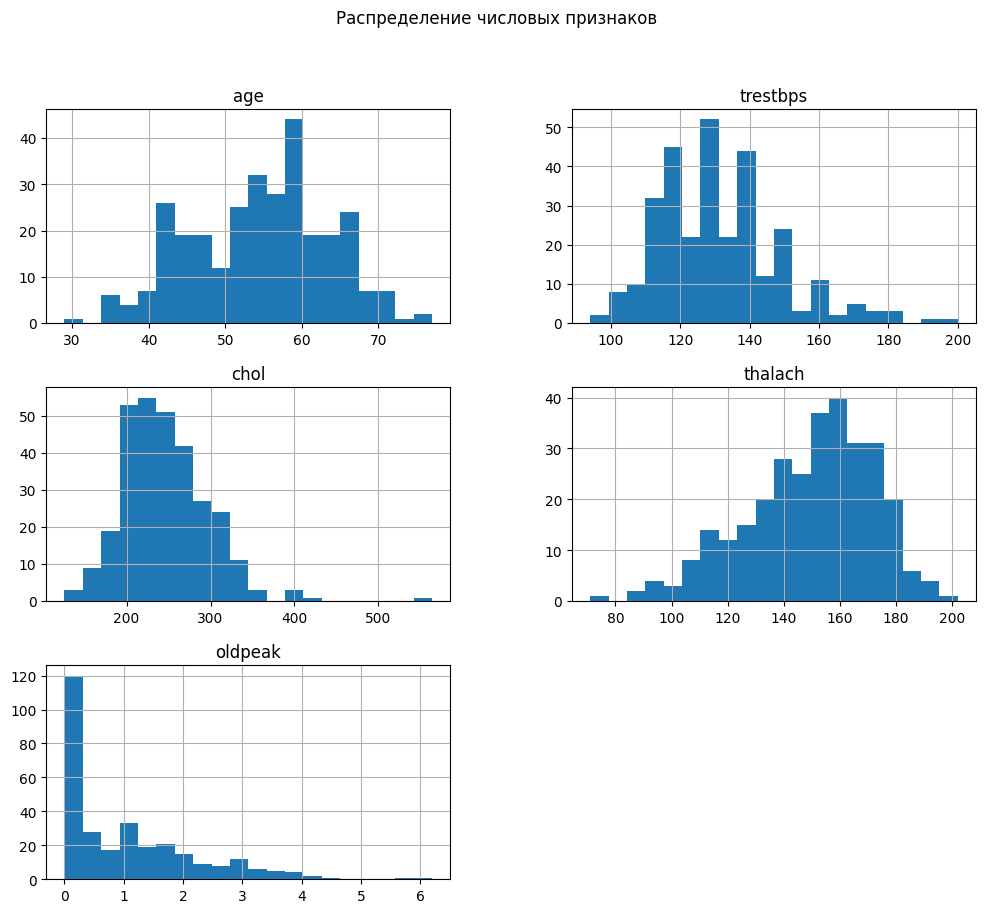

Вывод: распределения числовых признаков различаются – возраст близок к нормальному, холестерин и тромбозные показатели имеют смещение.


In [15]:
# 2. Распределение числовых признаков (гистограммы)
df[num_cols].hist(figsize=(12, 10), bins=20)
plt.suptitle("Распределение числовых признаков")
plt.savefig("plot2_numeric_histograms.png")
plt.show()
print("Вывод: распределения числовых признаков различаются – возраст близок к нормальному, холестерин и тромбозные показатели имеют смещение.")

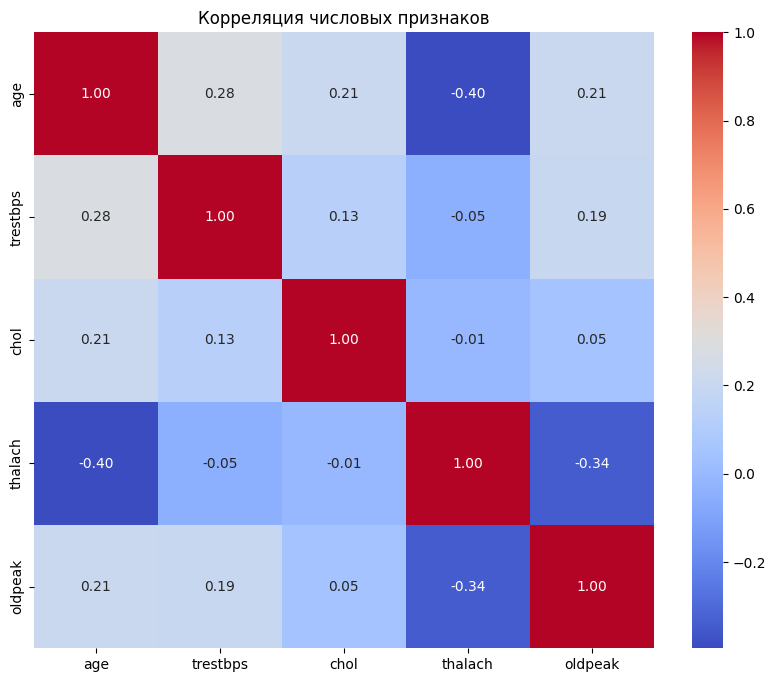

Вывод: сильной мультиколлинеарности нет, но есть умеренные связи (например, trestbps и age).


In [16]:
# 3. Корреляция числовых признаков (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция числовых признаков")
plt.savefig("plot3_correlation_heatmap.png")
plt.show()
print("Вывод: сильной мультиколлинеарности нет, но есть умеренные связи (например, trestbps и age).")

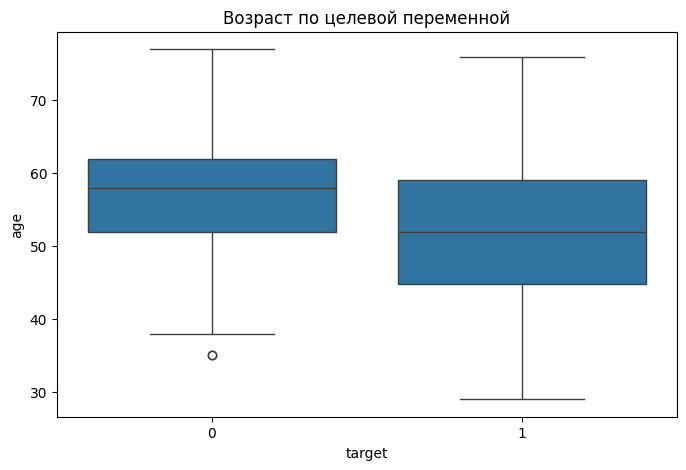

Вывод: у пациентов без болезнью сердца возраст в среднем выше, чем у тех, у кого болезни нет.


In [17]:
# 4. Boxplot числовых признаков по целевой переменной
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x=target, y="age")
plt.title("Возраст по целевой переменной")
plt.savefig("plot4_age_boxplot.png")
plt.show()
print("Вывод: у пациентов без болезнью сердца возраст в среднем выше, чем у тех, у кого болезни нет.")

In [18]:
# 5. Интерактивный scatter plot (age vs chol)
import plotly.express as px

fig = px.scatter(
    df,
    x="age",
    y="chol",
    color=target,
    title="Взаимосвязь возраста и холестерина по целевой переменной",
    hover_data=df.columns
)
fig.write_html("plot5_age_vs_chol.html")
fig.show()
print("Вывод: повышенный холестерин чаще встречается у пациентов среднего и старшего возраста, а также чаще у тех, кто болен сердечно-сосудистыми заболеваниями.")

Вывод: повышенный холестерин чаще встречается у пациентов среднего и старшего возраста, а также чаще у тех, кто болен сердечно-сосудистыми заболеваниями.


In [21]:
print("Вывод: повышенный холестерин чаще встречается у пациентов среднего и старшего возраста, а также чаще у тех, кто болен сердечно-сосудистыми заболеваниями.")

Вывод: повышенный холестерин чаще встречается у пациентов среднего и старшего возраста, а также чаще у тех, кто болен сердечно-сосудистыми заболеваниями.


# 4. Сохранение финального датасета

In [25]:
df.to_pickle("heart_clean.pkl")
print("\nФинальный датасет сохранён в 'heart_clean.pkl'")



Финальный датасет сохранён в 'heart_clean.pkl'


# 5. Выводы

In [27]:
print("""
Выводы:
- Данные загружены, проверены типы и статистики.
- Удалены дубликаты, проверены пропуски (их нет).
- Выделены числовые и категориальные признаки.
- Проведён анализ распределений и корреляций.
- Финальный датасет сохранён
""")


Выводы:
- Данные загружены, проверены типы и статистики.
- Удалены дубликаты, проверены пропуски (их нет).
- Выделены числовые и категориальные признаки.
- Проведён анализ распределений и корреляций.
- Финальный датасет сохранён

